In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
%matplotlib inline

In [2]:
labelencoder = preprocessing.LabelEncoder()

In [3]:
df = pd.read_csv("ford.csv")

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [7]:
obj_df = df.select_dtypes(include=['object']).copy()

In [8]:
obj_df.head()

,model,transmission,fuelType
0,Fiesta,Automatic,Petrol
1,Focus,Manual,Petrol
2,Focus,Manual,Petrol
3,Fiesta,Manual,Petrol
4,Fiesta,Automatic,Petrol


In [9]:
obj_df['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [10]:
obj_df['transmission'].value_counts()

Manual       15517
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [11]:
obj_df['fuelType'].value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [12]:
# encode model_enc col
obj_df['model_enc'] = labelencoder.fit_transform(df['model'])

In [13]:
# encode transmission_enc col
obj_df['transmission_enc'] = labelencoder.fit_transform(df['transmission'])

In [14]:
# encode fuelType col
obj_df['fuelType_enc'] = labelencoder.fit_transform(df['fuelType'])

In [15]:
obj_df.columns

Index(['model', 'transmission', 'fuelType', 'model_enc', 'transmission_enc',
       'fuelType_enc'],
      dtype='object')

In [16]:
### MODEL CODES

#  B-MAX                        0
#  C-MAX                        1
#  EcoSport                     2
#  Edge                         3
#  Escort                       4
#  Fiesta                       5
#  Focus                        6
#  Fusion                       7
#  Galaxy                       8
#  Grand C-MAX                  9
#  Grand Tourneo Connect        10
#  KA                           11
#  Ka+                          12
#  Kuga                         13
#  Mondeo                       14
#  Mustang                      15
#  Puma                         16
#  Ranger                       17
#  S-MAX                        18
#  Streetka                     19
#  Tourneo Connect              20
#  Tourneo Custom               21
#  Transit Tourneo              22


### TRANSMISSION CODES
#  Automatic                     0
#  Manual                        1
#  Semi-Auto                     2


### FUEL TYPE CODE

#  Diesel                        0
#  Electric                      1
#  Hydbrid                       2
#  Other                         3
#  Petrol                        4


In [17]:
df.loc[df['price'] > 50000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11912,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3


In [18]:
df.loc[df['mpg'] >= 100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,Kuga,2020,31000,Semi-Auto,10,Hybrid,135,201.8,2.5
6536,Kuga,2020,31991,Semi-Auto,2357,Hybrid,135,201.8,2.5
9220,Kuga,2020,32000,Automatic,10,Hybrid,140,201.8,2.5
12862,Kuga,2020,33500,Automatic,5534,Hybrid,140,201.8,2.5
13730,Kuga,2020,32995,Automatic,11,Hybrid,135,201.8,2.5


In [19]:
df['model'] = labelencoder.fit_transform(df['model'])


In [20]:
df['transmission'] = labelencoder.fit_transform(df['transmission'])


In [21]:
df['fuelType'] = labelencoder.fit_transform(df['fuelType'])


In [22]:
# locate car from the year 2060
df.loc[df['year'] >= 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,5,2060,6495,0,54807,4,205,42.8,1.4


In [23]:
# Drop the 2060 ford fiesta
df = df.drop(17726)

In [24]:
# Make sure deleted fiesta
df.loc[df['year'] >= 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [25]:
df.loc[df['mpg'] > 100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,13,2020,31000,2,10,2,135,201.8,2.5
6536,13,2020,31991,2,2357,2,135,201.8,2.5
9220,13,2020,32000,0,10,2,140,201.8,2.5
12862,13,2020,33500,0,5534,2,140,201.8,2.5
13730,13,2020,32995,0,11,2,135,201.8,2.5


In [26]:
df.loc[df['mpg'] < 75]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,5,2016,7999,1,31348,4,125,54.3,1.2
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6


In [27]:
df = df.drop(df[df['mpg'] > 50].index)

In [28]:
df.loc[df['mpg'] > 50]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [29]:
df.loc[df['mpg'] <28]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
302,15,2020,42489,0,3500,4,145,22.1,5.0
354,15,2018,31498,0,6250,4,145,23.5,5.0
364,15,2016,24999,2,42086,4,570,23.5,5.0
387,15,2019,39998,0,5000,4,145,22.6,5.0
741,15,2018,29998,1,20847,4,145,20.9,5.0
2264,15,2020,39990,2,691,4,145,22.1,5.0
3163,15,2017,27890,2,26452,4,580,23.5,5.0
3395,15,2017,28000,2,23179,4,570,23.5,5.0
3469,15,2017,31317,2,9511,4,145,23.5,5.0
3496,15,2018,33000,2,5064,4,145,23.5,5.0


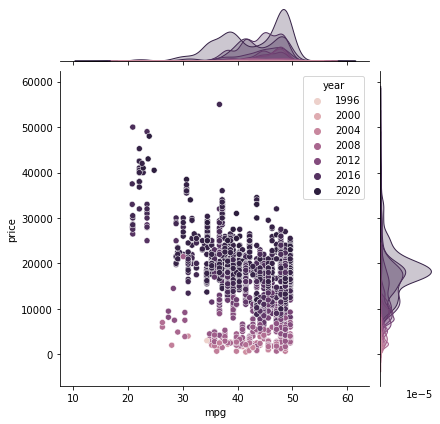

In [30]:
sns.jointplot(x='mpg', y='price', data=df, hue='year')   

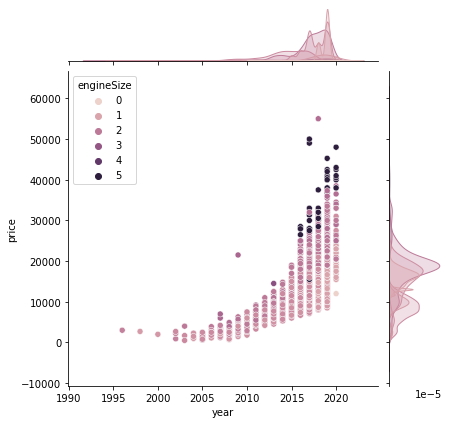

In [31]:
sns.jointplot(x='year', y='price', data=df, hue='engineSize')   

In [32]:
# predictor var
X = df[['year', 'mpg', 'engineSize', 'fuelType']]

# prediction var
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [33]:
# run sklearn, fit the linear model 
lr = linear_model.LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
# accuracy of guesses
lr.score(X, y)

0.7576452266376679

In [35]:
y_pred = lr.predict(x_test)

In [36]:
lr_diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred})

In [37]:
lr_diff.head(50)

,Actual Value,Predicted Value
8215,13100,13568.361203
1951,10950,16154.813819
3727,9499,8698.206780
13607,14495,21842.936982
15612,9000,11398.920852
15712,3989,-64.060785
5215,16990,14772.668710
16521,13999,19572.929714
6413,19750,21873.692476
6838,9498,13820.874518


In [38]:
df['predicted_price'] = lr_diff['Predicted Value']

In [39]:
df = df[df['predicted_price'].notna()]

In [40]:
df.head(50)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predicted_price
3,5,2019,17500,1,10460,4,145,40.3,1.5,18243.813564
23,13,2014,8995,1,59000,0,160,47.9,2.0,12841.850641
61,13,2018,17998,1,12162,4,145,39.2,1.5,17089.743550
63,6,2019,17498,1,2714,4,150,49.6,1.0,13510.102132
75,13,2017,17920,0,15815,4,235,38.2,1.5,15904.109372
134,21,2017,19995,1,14000,0,200,44.8,2.0,18324.167207
148,0,2014,6995,2,50800,4,160,44.1,1.6,9897.645029
184,5,2019,18998,1,3292,4,145,40.3,1.5,18243.813564
201,6,2017,17998,1,19525,4,145,41.5,2.0,16660.736083
216,1,2018,12198,1,7993,4,145,49.6,1.0,12008.826309


In [41]:
indexNames = df[df['predicted_price'] < 200 ].index
df.drop(indexNames , inplace=True)

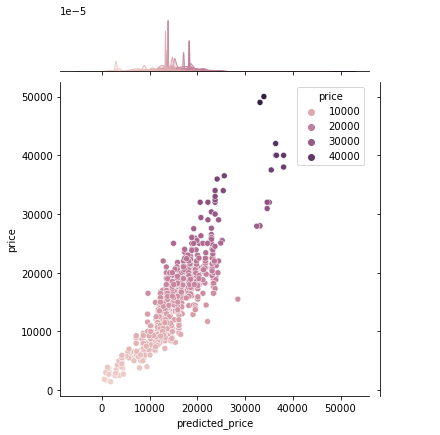

In [42]:
sns.jointplot(x='predicted_price', y='price', data=df, hue='price')   

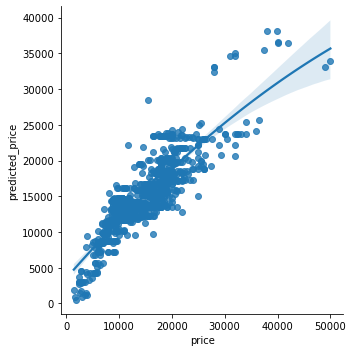

In [43]:
sns.lmplot(
    data = df, 
    x = "price",
    y = "predicted_price",
    order = 2
)

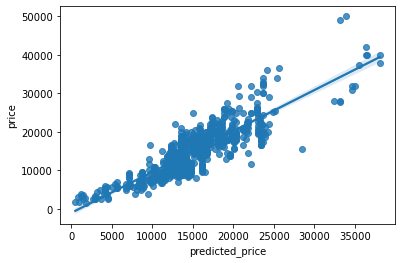

In [44]:
sns.regplot(x="predicted_price", y="price", data=df);

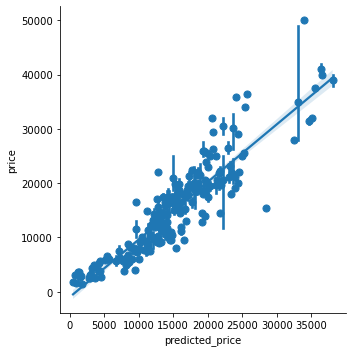

In [45]:
sns.lmplot(x="predicted_price", y="price", data=df, x_estimator=np.mean);

In [46]:
df['price_parity'] = df['predicted_price'] - df['price']

In [47]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predicted_price,price_parity
3,5,2019,17500,1,10460,4,145,40.3,1.5,18243.813564,743.813564
23,13,2014,8995,1,59000,0,160,47.9,2.0,12841.850641,3846.850641
61,13,2018,17998,1,12162,4,145,39.2,1.5,17089.743550,-908.256450
63,6,2019,17498,1,2714,4,150,49.6,1.0,13510.102132,-3987.897868
75,13,2017,17920,0,15815,4,235,38.2,1.5,15904.109372,-2015.890628


<AxesSubplot:xlabel='predicted_price', ylabel='price'>

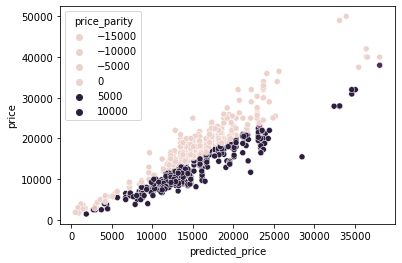

In [51]:
sns.scatterplot(x="predicted_price", y="price", hue="price_parity", hue_norm=(0,100), data=df)